# 第６章 機械学習

本章では，Fabio Gasparetti氏が公開しているNews Aggregator Data Setを用い，ニュース記事の見出しを「ビジネス」「科学技術」「エンターテイメント」「健康」のカテゴリに分類するタスク（カテゴリ分類）に取り組む．

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# 50.データの入手・整形  
[News Aggregator Data Set](https://archive.ics.uci.edu/ml/datasets/News+Aggregator)をダウンロードし、以下の要領で学習データ（train.txt），検証データ（valid.txt），評価データ（test.txt）を作成せよ．

ダウンロードしたzipファイルを解凍し，readme.txtの説明を読む．  
情報源（publisher）が”Reuters”, “Huffington Post”, “Businessweek”,   “Contactmusic.com”, “Daily Mail”の事例（記事）のみを抽出する．  
抽出された事例をランダムに並び替える．  
抽出された事例の80%を学習データ，残りの10%ずつを検証データと評価データに分割し，それぞれ  train.txt，valid.txt，test.txtというファイル名で保存する．ファイルには，１行に１事例を書き出すこととし，カテゴリ名と記事見出しのタブ区切り形式とせよ（このファイルは後に問題70で再利用する）．
学習データと評価データを作成したら，各カテゴリの事例数を確認せよ．

In [9]:
!head -5 ./news+aggregator/newsCorpora.csv

1	Fed official says weak data caused by weather, should not slow taper	http://www.latimes.com/business/money/la-fi-mo-federal-reserve-plosser-stimulus-economy-20140310,0,1312750.story\?track=rss	Los Angeles Times	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www.latimes.com	1394470370698
2	Fed's Charles Plosser sees high bar for change in pace of tapering	http://www.livemint.com/Politics/H2EvwJSK2VE6OF7iK1g3PP/Feds-Charles-Plosser-sees-high-bar-for-change-in-pace-of-ta.html	Livemint	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www.livemint.com	1394470371207
3	US open: Stocks fall after Fed official hints at accelerated tapering	http://www.ifamagazine.com/news/us-open-stocks-fall-after-fed-official-hints-at-accelerated-tapering-294436	IFA Magazine	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www.ifamagazine.com	1394470371550
4	Fed risks falling 'behind the curve', Charles Plosser says	http://www.ifamagazine.com/news/fed-risks-falling-behind-the-curve-charles-plosser-says-294430	IFA Magazine	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www

id,タイトル,url,出版社,カテゴリ(b=ビジネス,t=科学技術、e=エンターテインメント、m=健康),同じストーリーに関するニュースを含むクラスターの英数字ID,urlホスト名,おおよその出版時間(time stamp)がタブ区切りでcsvにまとめられている．

In [92]:
names = ['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME', 'TIMESTAMP']
df = pd.read_csv('./news+aggregator/newsCorpora.csv', header=None, sep='\t', encoding='utf-8', names=names)
df.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [93]:
target_publisher = ['Reuters', 'Huffington Post', 'Businessweek', 'Contactmusic.com', 'Daily Mail']
df_target = df.loc[df['PUBLISHER'].isin(target_publisher),['TITLE', 'PUBLISHER', 'CATEGORY']]

In [94]:
df_target.head()

,TITLE,PUBLISHER,CATEGORY
12,Europe reaches crunch point on banking union,Reuters,b
13,ECB FOCUS-Stronger euro drowns out ECB's messa...,Reuters,b
19,"Euro Anxieties Wane as Bunds Top Treasuries, S...",Businessweek,b
20,Noyer Says Strong Euro Creates Unwarranted Eco...,Businessweek,b
29,REFILE-Bad loan triggers key feature in ECB ba...,Reuters,b


In [96]:
#train:valid:test = 8:1:1で分割
RANDOM_STATE = 100
train, valid_and_test = train_test_split(df_target, test_size=0.2, shuffle=True, random_state=RANDOM_STATE, stratify=df_target['CATEGORY'])
valid, test = train_test_split(valid_and_test, test_size=0.5, shuffle=True, random_state=RANDOM_STATE, stratify=valid_and_test['CATEGORY'])
print('train : valid : test = ',len(train), len(valid), len(test))
train.to_csv('./train.csv', sep='\t', index=False)
valid.to_csv('./valid.csv', sep='\t', index=False)
test.to_csv('./test.csv', sep='\t', index=False)

train : valid : test =  10672 1334 1334


In [97]:
!mkdir csv
!mv *.csv csv

In [98]:
print('train data')
print(train['CATEGORY'].value_counts())
print('valid data')
print(valid['CATEGORY'].value_counts())
print('test data')
print(test['CATEGORY'].value_counts())

train data
b    4502
e    4223
t    1219
m     728
Name: CATEGORY, dtype: int64
valid data
b    562
e    528
t    153
m     91
Name: CATEGORY, dtype: int64
test data
b    563
e    528
t    152
m     91
Name: CATEGORY, dtype: int64


### 51.特徴量抽出  
学習データ，検証データ，評価データから特徴量を抽出し，それぞれtrain.feature.txt，valid.feature.txt，test.feature.txtというファイル名で保存せよ． なお，カテゴリ分類に有用そうな特徴量は各自で自由に設計せよ．記事の見出しを単語列に変換したものが最低限のベースラインとなるであろう．

前処理の流れ  
   
1.記号を等長の半角スペースに変換   
2.アルファベットの小文字化  
3.数字を0に統一  
4.単語列に分割  
5.stopwordの除去

In [99]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

sw = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kskkrt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/kskkrt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [100]:
import re
import string

def preprocessing(text):
    table = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #記号を等長の半角スペースで変換する変換表の作成
    text = text.translate(table)
    text = text.lower()
    text = re.sub('[0-9]+', '0', text)
    word_list = word_tokenize(text)
    for word in word_list:
        if word in sw:
            word_list.remove(word)
    return ' '.join(word_list)

In [101]:
df = pd.concat([train, valid, test], axis=0)
df.head()

,TITLE,PUBLISHER,CATEGORY
36476,L'wren Scott - L'Wren Scott's housekeeper reve...,Contactmusic.com,e
244832,Australia Set to Fund Second Clean-Energy Proj...,Businessweek,b
22214,Google Brings Android to Smartwatches in Mobil...,Businessweek,t
11237,Tina Fey - Tina Fey Dispels Mean Girls Sequel ...,Contactmusic.com,e
420133,Rick Rubin - Rick Rubin Takes An Ice Bath For ...,Contactmusic.com,e


In [102]:
df.reset_index(drop=True, inplace=True)
df['title_words'] = df['TITLE'].map(lambda x:preprocessing(x))
df.head()

,TITLE,PUBLISHER,CATEGORY,title_words
0,L'wren Scott - L'Wren Scott's housekeeper reve...,Contactmusic.com,e,l wren scott l wren scott housekeeper reveals ...
1,Australia Set to Fund Second Clean-Energy Proj...,Businessweek,b,australia set fund second clean energy project...
2,Google Brings Android to Smartwatches in Mobil...,Businessweek,t,google brings android smartwatches mobile push
3,Tina Fey - Tina Fey Dispels Mean Girls Sequel ...,Contactmusic.com,e,tina fey tina fey dispels mean girls sequel ru...
4,Rick Rubin - Rick Rubin Takes An Ice Bath For ...,Contactmusic.com,e,rick rubin rick rubin takes ice bath als chall...


ベクトル化の手順  
1.title_wordsからtf-idfに基づいて，ベクトル化  
2.publisherのダミー変数を末尾に追加

In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer

train_valid = df[:len(train)+len(valid)].copy()
test = df[len(train)+len(valid):].copy()

#uni-gram, bi-gramでベクトル化.min_dfで1以上の整数を指定すると登場文書の下限を設定できる．超えないと除去
tf_idf_vectorizer = TfidfVectorizer(min_df=15, ngram_range=(1, 2))

X_train_valid = tf_idf_vectorizer.fit_transform(train_valid['title_words'])
X_test = tf_idf_vectorizer.transform(test['title_words'])

X_train_valid = pd.DataFrame(X_train_valid.toarray(), columns=tf_idf_vectorizer.get_feature_names_out())
X_test = pd.DataFrame(X_test.toarray(), columns=tf_idf_vectorizer.get_feature_names_out())

#末尾にpublisherの追加
pub_train_valid = pd.get_dummies(df['PUBLISHER'][:len(X_train_valid)])
test_pub_df = df['PUBLISHER'][len(X_train_valid):]
test_pub_df.reset_index(drop=True, inplace=True)
pub_test = pd.get_dummies(test_pub_df)
del pub_train_valid['Businessweek'] #多重共線性の考慮
del pub_test['Businessweek']
X_train_valid = pd.concat([X_train_valid, pub_train_valid], axis=1)
X_test = pd.concat([X_test, pub_test], axis=1)

X_train = X_train_valid[:len(train)]
X_valid = X_train_valid[len(train):]

X_train.to_csv('./features_csv/X_train.csv', sep='\t', index=False)
X_valid.to_csv('./features_csv/X_valid.csv', sep='\t', index=False)
X_test.to_csv('./features_csv/X_test.csv', sep='\t', index=False)

print(X_train.shape)

(10672, 1571)


In [119]:
X_train.iloc[:5, 1560:]

,young,your,yr,yuan,zac,zac efron,zone,Contactmusic.com,Daily Mail,Huffington Post,Reuters
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0


In [120]:
train.head()

,TITLE,PUBLISHER,CATEGORY
36476,L'wren Scott - L'Wren Scott's housekeeper reve...,Contactmusic.com,e
244832,Australia Set to Fund Second Clean-Energy Proj...,Businessweek,b
22214,Google Brings Android to Smartwatches in Mobil...,Businessweek,t
11237,Tina Fey - Tina Fey Dispels Mean Girls Sequel ...,Contactmusic.com,e
420133,Rick Rubin - Rick Rubin Takes An Ice Bath For ...,Contactmusic.com,e


### 52．学習  
51で構築した学習データを用いて，ロジスティック回帰モデルを学習せよ．

In [121]:
from sklearn.linear_model import LogisticRegression

#モデルの定義と学習
lgr = LogisticRegression(random_state=RANDOM_STATE, max_iter=10000)
lgr.fit(X_train, train['CATEGORY'])

LogisticRegression(max_iter=10000, random_state=100)

### 53.予測  
52で学習したロジスティック回帰モデルを用い，与えられた記事見出しからカテゴリとその予測確率を計算するプログラムを実装せよ．

In [128]:
#predictで予測カテゴリを得，　predict_probaの最大値を得て予測確率を計算する．
import numpy as np

def get_category_prob(model, input_data):
    prob_list = np.max(model.predict_proba(input_data), axis=1)
    category = model.predict(input_data)
    return list(zip(category, prob_list))

In [131]:
print(get_category_prob(lgr, X_train)[:10])
print(get_category_prob(lgr, X_test)[:10])

[('e', 0.9902951577370115), ('b', 0.915803746603934), ('t', 0.7501301337669654), ('e', 0.9909949653594269), ('e', 0.9843662337265378), ('e', 0.9974895735111639), ('t', 0.45845365049624476), ('m', 0.9027914431944027), ('b', 0.7853021140862857), ('e', 0.47724431286309427)]
[('e', 0.9933453667429517), ('b', 0.5004147540738448), ('e', 0.9263275710984195), ('e', 0.4710352942767853), ('b', 0.9875671941279012), ('t', 0.5856034672941302), ('t', 0.7078617411422421), ('b', 0.9391582662135162), ('e', 0.6322531501462572), ('b', 0.7731756956325536)]


### 54.正解率の計測  
52で学習したロジスティック回帰モデルの正解率を，学習データおよび評価データ上で計測せよ

In [133]:
from sklearn.metrics import accuracy_score

print('train_accuracy: ', accuracy_score(lgr.predict(X_train), train['CATEGORY']))
print('test_accuracy: ', accuracy_score(lgr.predict(X_test), test['CATEGORY']))

train_accuracy:  0.9101386806596702
test_accuracy:  0.876311844077961


### 55.混同行列の作成  
52で学習したロジスティック回帰モデルの混同行列（confusion matrix）を，学習データおよび評価データ上で作成せよ．

[[4294  112   15   81]
 [  92 4110    6   15]
 [  95  138  483   12]
 [ 237  144   12  826]]


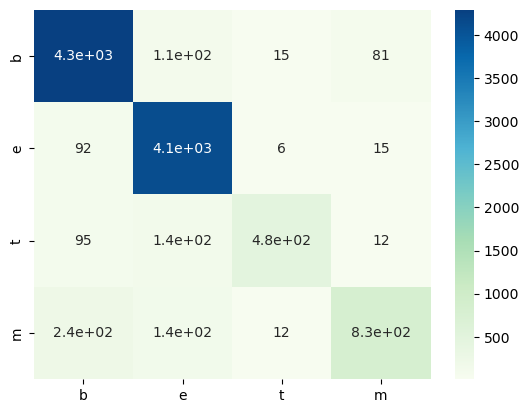

[[529  21   2  11]
 [ 14 510   1   3]
 [ 25  20  41   5]
 [ 38  22   3  89]]


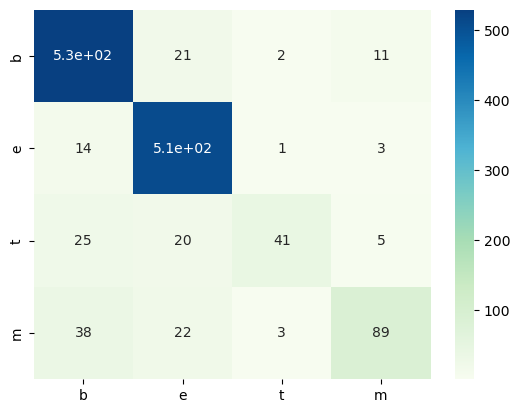

In [141]:
from sklearn.metrics import confusion_matrix

train_cm_mat = confusion_matrix(train['CATEGORY'], lgr.predict(X_train))
test_cm_mat = confusion_matrix(test['CATEGORY'], lgr.predict(X_test))
categories = ['b', 'e', 't', 'm']

for mat in [train_cm_mat, test_cm_mat]:
    print(mat)
    sns.heatmap(mat, annot=True, cmap='GnBu', xticklabels=categories, yticklabels=categories)
    plt.show()

### 56.適合率,再現率,F１スコアの計測  
52で学習したロジスティック回帰モデルの適合率，再現率，F1スコアを，評価データ上で計測せよ．カテゴリごとに適合率，再現率，F1スコアを求め，カテゴリごとの性能をマイクロ平均（micro-average）とマクロ平均（macro-average）で統合せよ．

In [186]:
from sklearn.metrics import precision_score, recall_score, f1_score

def get_scores(y_true, y_pred, labels=['b', 'e', 't', 'm']):
    """
    各スコアのaverageパラメータでmicro,macroを指定可能．
    defaultはbinary.Noneを指定すると，各クラスのスコアが返される．
    None時, labelsでクラス名を指定できる．
    """
    
    precision = precision_score(y_true, y_pred, average=None, labels=labels)
    precision_mi = precision_score(y_true, y_pred, average='micro')
    precision_ma = precision_score(y_true, y_pred, average='macro')
    
    recall = recall_score(y_true, y_pred, average=None, labels=labels)
    recall_mi = recall_score(y_true, y_pred, average='micro')
    recall_ma = recall_score(y_true, y_pred, average='macro')
    
    f1 = f1_score(y_true, y_pred, average=None, labels=labels)
    f1_mi = f1_score(y_true, y_pred, average='micro')
    f1_ma = f1_score(y_true, y_pred, average='macro')

    scores = pd.DataFrame({'適合率':[*precision, precision_mi, precision_ma],\
                           '再現率':[*recall, recall_mi, recall_ma],\
                           'F1値':[*f1, f1_mi, f1_ma]},\
                           index=['b', 'e', 't', 'm','micro','macro'])
    
    return scores

In [179]:
y_true = test['CATEGORY'].copy()
y_pred = lgr.predict(X_test)

In [191]:
get_scores(y_true, y_pred)

,適合率,再現率,F1値
b,0.872937,0.939609,0.905047
e,0.890052,0.965909,0.926431
t,0.824074,0.585526,0.684615
m,0.872340,0.450549,0.594203
micro,0.876312,0.876312,0.876312
macro,0.864851,0.735399,0.777574


### 57.特徴量の重みの確認  
52で学習したロジスティック回帰モデルの中で，重みの高い特徴量トップ10と，重みの低い特徴量トップ10を確認せよ．

classes_, coef_メソッドでクラス, 偏回帰係数(重み)をそれぞれ得ることができる．

In [194]:
lgr.coef_

array([[ 0.47768433, -0.78470482,  0.61657929, ..., -1.75262434,
        -1.37615573,  0.12261428],
       [ 0.22088651,  0.55377577, -0.28651283, ...,  1.57017608,
         1.38076985,  0.14385721],
       [-0.22379539,  0.82532999, -0.16367932, ...,  0.47460324,
         0.28361228, -0.18377058],
       [-0.47477546, -0.59440094, -0.16638714, ..., -0.29215497,
        -0.2882264 , -0.08270091]])

b, e, m, tカテゴリそれぞれを予測する際の重みが順に格納されているのがわかる

In [ ]:
features = X_train.columns.to_list()
idx = list(range(1, 11))
for c, coef in zip(lgr.classes_, lgr.coef_):
    print(f'CATEGORY-{c}')
    weights = pd.Series(coef,index=features)
    top10 = weights.nlargest(10).index
    worst10 = weights.nsmallest(10).index
    display(pd.DataFrame({'top10': top10, 'worst10': worst10},index=idx))
    

CATEGORY-b


,top10,worst10
1,bank,Contactmusic.com
2,obamacare,ebola
3,ukraine,microsoft
4,fed,aereo
5,china,drug
6,ecb,video
7,stocks,Daily Mail
8,oil,apple
9,mcdonald,facebook
10,pfizer,dies


CATEGORY-e


,top10,worst10
1,Contactmusic.com,google
2,film,study
3,kardashian,scientists
4,dies,billion
5,cannes,us
6,chris,could
7,hbo,ceo
8,met,nasa
9,aereo,china
10,kim,climate


CATEGORY-m


,top10,worst10
1,ebola,facebook
2,cancer,climate
3,study,bank
4,fda,gm
5,drug,amazon
6,mers,google
7,cigarettes,apple
8,cdc,twitter
9,medical,ceo
10,cases,jpmorgan


CATEGORY-t


,top10,worst10
1,google,day
2,facebook,stocks
3,apple,shares
4,microsoft,drug
5,climate,fed
6,nasa,still
7,tesla,cancer
8,heartbleed,percent
9,gm,ukraine
10,earth,ecb


ビジネスではbankやukraineなどの時事的な単語,エンタメではfilmのように娯楽の単語,健康ではeboraやcancerなど疾患や感染症など,科学技術ではgoogleやfacebookをはじめとするBig Techなど直感的にもイメージしやすいものがtopに入っている．

### 58.正則化パラメータの変更  
ロジスティック回帰モデルを学習するとき，正則化パラメータを調整することで，学習時の過学習（overfitting）の度合いを制御できる．異なる正則化パラメータでロジスティック回帰モデルを学習し，学習データ，検証データ，および評価データ上の正解率を求めよ．実験の結果は，正則化パラメータを横軸，正解率を縦軸としたグラフにまとめよ

In [213]:
from tqdm import tqdm

result = []
#logistic regressionの正則化はdefaultでリッジになっているので，手法は固定し正則の強度の逆数Cのみ変える．
for C in tqdm(np.logspace(-5, 4, 10, base=10)): #10の-5から4乗まで10点でサンプル
    lgr = LogisticRegression(random_state=RANDOM_STATE, max_iter=10000, C=C)
    lgr.fit(X_train, train['CATEGORY'])
    
    train_acc = accuracy_score(train['CATEGORY'], lgr.predict(X_train))
    valid_acc = accuracy_score(valid['CATEGORY'], lgr.predict(X_valid))
    test_acc = accuracy_score(test['CATEGORY'], lgr.predict(X_test))
    
    result.append([C, train_acc, valid_acc, test_acc])

100%|███████████████████████████████████████████| 10/10 [02:31<00:00, 15.12s/it]


[]

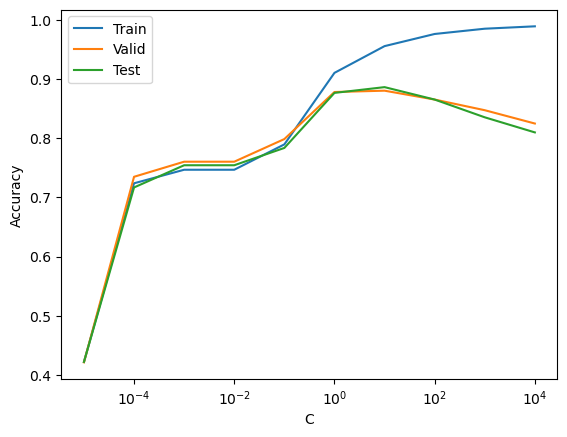

In [215]:
result = np.array(result).T
plt.plot(result[0], result[1], label='Train')
plt.plot(result[0], result[2], label='Valid')
plt.plot(result[0], result[3], label='Test')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.legend()
plt.plot()

Cの逆数が正則化の強さを示すので，C=10より大きいと正則化項の効果が薄く過学習を起こしていると見られる．反対に正則化が強すぎる(Cが小さすぎる)と重みが十分に変えられず精度が低くなっている．

### 59.ハイパーパラメータの探索  
学習アルゴリズムや学習パラメータを変えながら，カテゴリ分類モデルを学習せよ．検証データ上の正解率が最も高くなる学習アルゴリズム・パラメータを求めよ．また，その学習アルゴリズム・パラメータを用いたときの評価データ上の正解率を求めよ．

まずロジスティック回帰の初期パラメータを取得する

In [228]:
pd.Series(LogisticRegression().get_params())

C                       1.0
class_weight           None
dual                  False
fit_intercept          True
intercept_scaling         1
l1_ratio               None
max_iter                100
multi_class            auto
n_jobs                 None
penalty                  l2
random_state           None
solver                lbfgs
tol                  0.0001
verbose                   0
warm_start            False
dtype: object

その他，ベクトル化の過程でtf-idfの利用ngramの範囲ngram_rangeや，登場文書数の下限min_dfなどの変更も考えられるが，一旦l1_ratioとCのみ変更する．

#### グリッドサーチ

#### Optunaの利用

In [ ]:
import optuna

